In [1]:
import datetime
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

In [2]:
# 지표 데이터 가져오기
stock_data = pd.read_excel('./data/index_Infomation_v0.1.xlsx')
stock_data['Date'] = pd.to_datetime(stock_data['Date'])
stock_data

,Date,nasdaq_Close,snp500_Close,DJI_Close,KOSPI_Close,samsung_PER,samsung_PBR,samsung_ROE,apple_PER,apple_PBR,...,중앙은행 기준금리,생산자물가지수,수입물가지수,소비자물가지수,수입,수출,경상수지,소비자심리지수,기업경기실사지수,foreign_exchange_reserves
0,2014-11-01,4630.74023,2018.05004,17390.5195,1964.43,6.29,1.47,0.233704,3.794397,5.922144,...,2.0,100.12,113.7,94.015,105.99,107.37,10582.7,103.3,71,"3,631"
1,2014-11-02,4630.74023,2018.05004,17390.5195,1964.43,6.29,1.47,0.233704,3.794397,5.922144,...,2.0,100.12,113.7,94.015,105.99,107.37,10582.7,103.3,71,"3,631"
2,2014-11-03,4638.91015,2017.81005,17366.2402,1952.97,6.24,1.45,0.232372,3.843583,5.998912,...,2.0,100.12,113.7,94.015,105.99,107.37,10582.7,103.3,71,"3,631"
3,2014-11-04,4623.64013,2012.09997,17383.8398,1935.19,6.15,1.43,0.232520,3.815476,5.955043,...,2.0,100.12,113.7,94.015,105.99,107.37,10582.7,103.3,71,"3,631"
4,2014-11-05,4620.72021,2023.56994,17484.5292,1931.43,6.08,1.42,0.233553,3.824611,5.969301,...,2.0,100.12,113.7,94.015,105.99,107.37,10582.7,103.3,71,"3,631"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3525,2024-06-26,17805.16010,5477.89990,39127.8007,2792.05,38.15,1.56,0.040891,33.713045,52.617977,...,1.5,115.10,148.6,106.830,155.99,139.04,567.1,104.3,86,"4,122"
3526,2024-06-27,17858.67960,5482.87011,39164.0585,2784.06,38.29,1.57,0.041003,33.847424,52.827711,...,1.5,115.10,148.6,106.830,155.99,139.04,567.1,104.3,86,"4,122"
3527,2024-06-28,17732.59960,5460.47998,39118.8593,2797.82,38.24,1.57,0.041056,33.297263,51.969042,...,1.5,115.10,148.6,106.830,155.99,139.04,567.1,104.3,86,"4,122"
3528,2024-06-29,17732.59960,5460.47998,39118.8593,2797.82,38.24,1.57,0.041056,33.297263,51.969042,...,1.5,115.10,148.6,106.830,155.99,139.04,567.1,104.3,86,"4,122"


In [3]:
compare1 = "samsung"  # samsung, apple
compare2 = "US CB Consumer Sentiment Index"
compare2data = "미국 CB 소비자신뢰지수"

In [4]:
# 필요한 데이터만 가져오기
df = stock_data[['Date', f'{compare1}_Close', f'{compare2data}', 'dollar_to_won_Close']]
df['US_GDP_KRW'] = round(df[f'{compare2data}'] * df['dollar_to_won_Close'])
df

C:\Users\4호실-3\AppData\Local\Temp\ipykernel_1672\1357975989.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['US_GDP_KRW'] = round(df[f'{compare2data}'] * df['dollar_to_won_Close'])


,Date,samsung_Close,미국 CB 소비자신뢰지수,dollar_to_won_Close,US_GDP_KRW
0,2014-11-01,24880.0,100.48750,1053.80004,105894.0
1,2014-11-02,24880.0,100.48750,1053.80004,105894.0
2,2014-11-03,24700.0,100.48750,1051.19995,105632.0
3,2014-11-04,24340.0,100.48750,1081.59997,108687.0
4,2014-11-05,24040.0,100.48750,1076.90002,108215.0
...,...,...,...,...,...
3525,2024-06-26,81300.0,98.91297,1390.89001,137577.0
3526,2024-06-27,81600.0,98.91297,1393.38000,137823.0
3527,2024-06-28,81500.0,98.91297,1386.94995,137187.0
3528,2024-06-29,81500.0,98.91297,1386.94995,137187.0


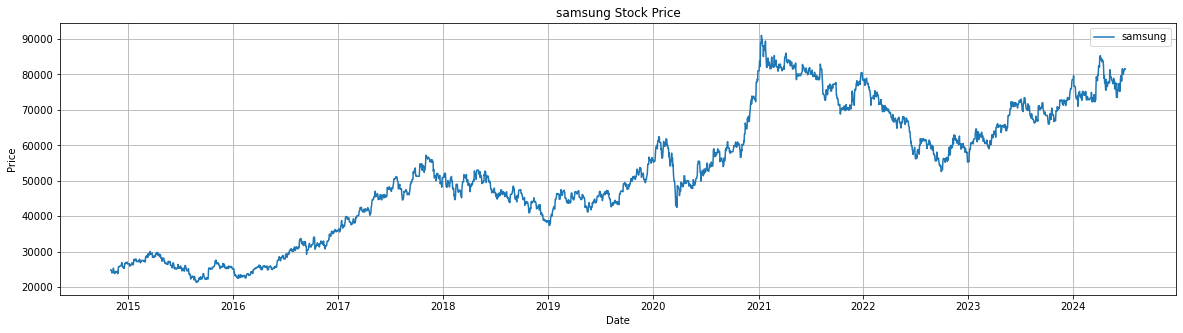

In [5]:
# 애플 주식 그래프 그리기
plt.figure(figsize=(20, 5))
plt.plot(df['Date'], df[f'{compare1}_Close'], label=f'{compare1}')

plt.title(f'{compare1} Stock Price')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.grid(True)

plt.show()

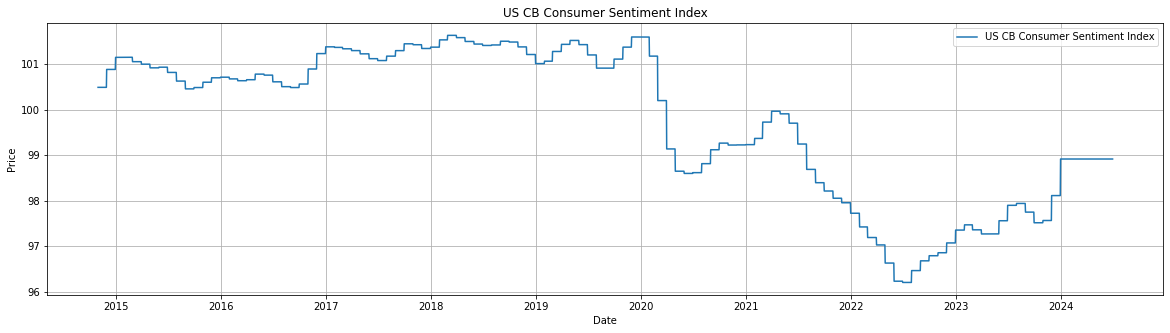

In [6]:
# 미 GDP 그래프 그리기
plt.figure(figsize=(20,5))
plt.plot(df['Date'], df[f'{compare2data}'], label=f'{compare2}')

plt.title(f'{compare2}')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.grid(True)

plt.show()

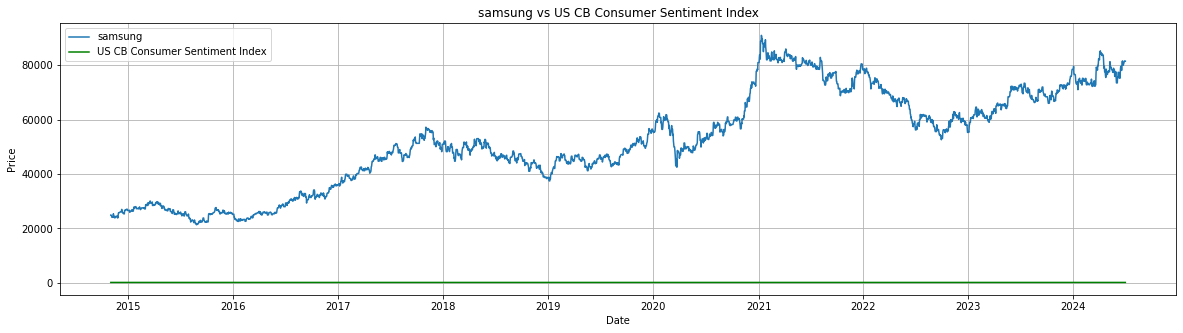

In [7]:
# 애플 vs 미GDP 그래프 그리기
plt.figure(figsize=(20,5))
plt.plot(df['Date'], df[f'{compare1}_Close'], label=f'{compare1}')
plt.plot(df['Date'], df[f'{compare2data}'], label=f'{compare2}', color='green')

plt.title(f'{compare1} vs {compare2}')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.grid(True)

plt.show()

In [8]:
# 0과 1 사이의 값으로 정규화
def normalize(df, column):
    return (df[column] - df[column].min()) / (df[column].max() - df[column].min())

In [9]:
compare1_normalize = normalize(df, f'{compare1}_Close')
compare2_normalize = normalize(df, f'{compare2data}')

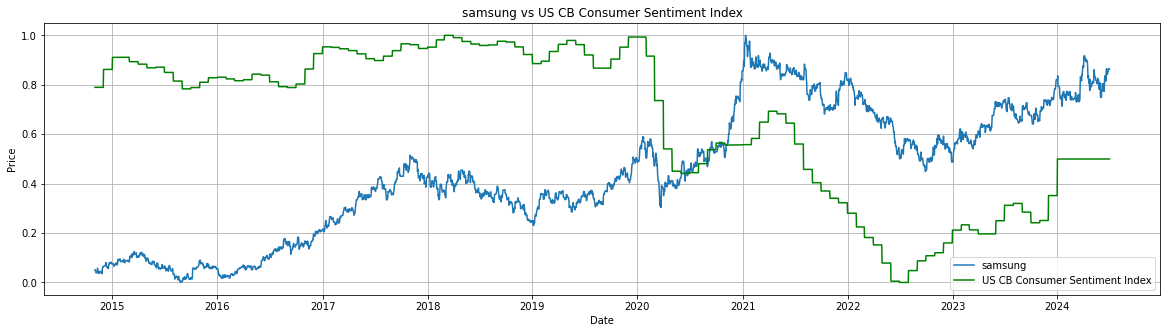

In [10]:
# 정규화 적용 애플주식과 미GDP 그래프
plt.figure(figsize=(20, 5))
plt.plot(df['Date'], compare1_normalize, label=f'{compare1}')
plt.plot(df['Date'], compare2_normalize, label=f'{compare2}', color='green')

plt.title(f'{compare1} vs {compare2}')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.grid(True)

plt.show()

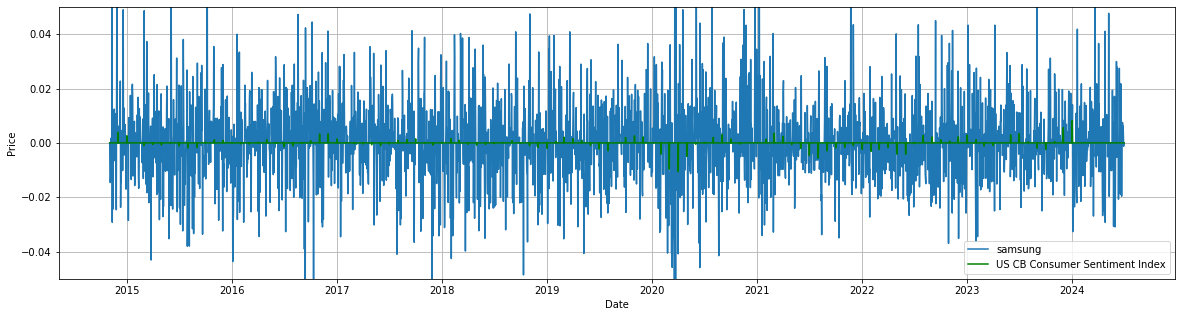

In [11]:
# 변동율 차이 비교
compare1_daily_change = df[f'{compare1}_Close'].pct_change()
compare2_daily_change = df[f'{compare2data}'].pct_change()

#그래프화
plt.figure(figsize=(20,5))
plt.plot(df['Date'], compare1_daily_change, label=f'{compare1}')
plt.plot(df['Date'], compare2_daily_change, label=f'{compare2}', color='green')
plt.ylim(-0.05, 0.05)

plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.grid(True)

plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


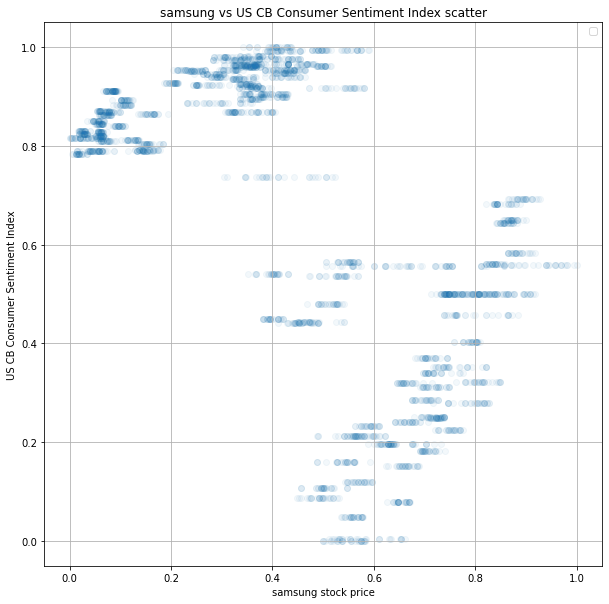

In [12]:
# 정규화 데이터로 산점도 그래프
plt.figure(figsize=(10,10))
plt.scatter(compare1_normalize, compare2_normalize, alpha=0.05)

plt.title(f'{compare1} vs {compare2} scatter')
plt.xlabel(f'{compare1} stock price')
plt.ylabel(f'{compare2}')
plt.legend()
plt.grid(True)

plt.show()

In [13]:
# Calculate the correlation
correlation = df[f'{compare2data}'].corr(df[f'{compare1}_Close'])
print(f"Correlation between {compare2} and {compare1} Stock Price: {correlation:.2f}")

Correlation between US CB Consumer Sentiment Index and samsung Stock Price: -0.61
